# Predicting EV Charging Station Usage

[Insert Project Details and Motivations Here]

## Project Setup Environment
Run the code block below to ensure setup is right for the notebook.

In [ ]:
!pip install opendatasets

import opendatasets as od

Download dataset to Google Colab
Note: Replace link with database url.

Step:
1. Enter kaggle username (from Kaggle profile) when prompted
2. Enter API Key when prompted

To get API Key:
1. Go to kaggle -> settings
2. Scroll down to API section
3. Create new token (this will download a json file to your computer)
4. Open the file (you can use sublime text or vscode to open file)
5. Copy paste just the API key without quotations

In [ ]:
od.download('https://www.kaggle.com/datasets/venkatsairo4899/ev-charging-station-usage-of-california-city')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: prerna25091997
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/venkatsairo4899/ev-charging-station-usage-of-california-city


100%|██████████| 11.4M/11.4M [00:00<00:00, 12.3MB/s]


## Prepare Dataset

In [ ]:
import pandas as pd
cali_df = pd.read_csv('/content/ev-charging-station-usage-of-california-city/EVChargingStationUsage.csv')
cali_df.shape

<ipython-input-3-0c121083877a>:2: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  cali_df = pd.read_csv('/content/ev-charging-station-usage-of-california-city/EVChargingStationUsage.csv')


(259415, 33)

In [ ]:
cali_df.columns

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)',
       'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'GHG Savings (kg)',
       'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Country', 'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number'],
      dtype='object')

In [ ]:
cali_df.head()

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.0,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.0,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.0,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.0,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.0,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN


### Check unique values

In [ ]:
cali_df['Address 1'].unique()

array(['250 Hamilton Ave', '528 High St', 'Bryant St',
       '3700 Middlefield Rd', '1520 Walnut Dr', '1514 Walnut Dr',
       '500-532 Webster St', '532 Webster St', '275 Cambridge Ave',
       '400 Cambridge Ave', '445 Bryant St', '520 Webster St',
       '1213 Newell Rd', '528 high st', '528 High St.', '533 Cowper St',
       '520 Cowper St', '475 Cambridge Ave', '350 Sherman Ave',
       '358 Sherman Ave'], dtype=object)

### Drop unnecessary columns

In [ ]:
# Fee
# Energy (kWh)
# GHG Savings (kg)
# Gasoline Savings (gallons)
# Total Duration (hh:mm)

columns_to_keep = [
    'Station Name', 'Start Date', 'Charging Time (hh:mm:ss)',
    'Port Type', 'Port Number', 'Plug Type',
    'Address 1', 'Postal Code', 'Latitude', 'Longitude', 'Ended By',
    'Plug In Event Id', 'Driver Postal Code', 'User ID', 'Model Number'
]

# 'Station Name', 'Start Date', 'End Date', 'Charging Time (hh:mm:ss)',
# 'Energy (kWh)', 'GHG Savings (kg)', 'Gasoline Savings (gallons)', 'Port Number',
# 'Address 1', 'Latitude', 'Longitude', 'Fee', 'Plug In Event Id'

# Drop other columns except columns_to_keep
df = cali_df[columns_to_keep]
df.head()

,Station Name,Start Date,Charging Time (hh:mm:ss),Port Type,Port Number,Plug Type,Address 1,Postal Code,Latitude,Longitude,Ended By,Plug In Event Id,Driver Postal Code,User ID,Model Number
0,PALO ALTO CA / HAMILTON #1,7/29/2011 20:17,1:54:03,Level 2,2,J1772,250 Hamilton Ave,94301,37.444572,-122.160309,Plug Out at Vehicle,3,95124.0,3284.0,NaN
1,PALO ALTO CA / HAMILTON #1,7/30/2011 0:00,0:01:54,Level 2,2,J1772,250 Hamilton Ave,94301,37.444572,-122.160309,Customer,4,94301.0,4169.0,NaN
2,PALO ALTO CA / HAMILTON #1,7/30/2011 8:16,4:17:28,Level 2,2,J1772,250 Hamilton Ave,94301,37.444572,-122.160309,Plug Out at Vehicle,5,94301.0,4169.0,NaN
3,PALO ALTO CA / HAMILTON #1,7/30/2011 14:51,2:02:58,Level 2,2,J1772,250 Hamilton Ave,94301,37.444572,-122.160309,Customer,6,94302.0,2545.0,NaN
4,PALO ALTO CA / HAMILTON #1,7/30/2011 18:51,0:43:54,Level 2,2,J1772,250 Hamilton Ave,94301,37.444572,-122.160309,Plug Out at Vehicle,7,94043.0,3765.0,NaN


# Change Data type

In [ ]:
# Check dtypes of the dependent variables
df.dtypes

,0
Station Name,object
Start Date,object
Charging Time (hh:mm:ss),object
Port Type,object
Port Number,int64
Plug Type,object
Address 1,object
Postal Code,int64
Latitude,float64
Longitude,float64


### Convert Charging Time to Seconds

In [ ]:
# Function to convert time in "hh:mm:ss" format to seconds
def time_to_seconds(time_str):
    try:
        h, m, s = map(int, time_str.split(':'))
        return h * 3600 + m * 60 + s
    except (ValueError, AttributeError):
        return None

# Convert 'Total Duration' and 'Charging Time' columns to seconds
# Drop Charging Time (hh:mm:ss)
df = df.copy()
df['Charging Time (seconds)'] = df['Charging Time (hh:mm:ss)'].apply(time_to_seconds)
df = df.drop(columns=['Charging Time (hh:mm:ss)'])

# Print data types of all columns after transformation
print(df.dtypes)

Station Name                object
Start Date                  object
Port Type                   object
Port Number                  int64
Plug Type                   object
Address 1                   object
Postal Code                  int64
Latitude                   float64
Longitude                  float64
Ended By                    object
Plug In Event Id             int64
Driver Postal Code         float64
User ID                     object
Model Number                object
Charging Time (seconds)      int64
dtype: object


### Convert to Start Date to datetime format

In [ ]:
# Convert 'Start Date' and 'End Date' columns to datetime format
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')

# Print data types of all columns after transformation
print(df.dtypes)

Station Name                       object
Start Date                 datetime64[ns]
Port Type                          object
Port Number                         int64
Plug Type                          object
Address 1                          object
Postal Code                         int64
Latitude                          float64
Longitude                         float64
Ended By                           object
Plug In Event Id                    int64
Driver Postal Code                float64
User ID                            object
Model Number                       object
Charging Time (seconds)             int64
dtype: object


Station Name         Keep                 object
Start Date           Keep         datetime64[ns]
Charging Time (hh:mm:ss)    Dependent Variable          object
Port Type            Keep                 object
Port Number          Keep                  int64
Plug Type            Keep                 object
Address 1            Keep                 object
Postal Code          Keep                  int64
Latitude             Keep for now                float64
Longitude            Keep for now                float64
Ended By             Keep for now                 object
Plug In Event Id     Keep for now                  int64
Driver Postal Code   Keep for now                float64
User ID              Keep                 object
Total Duration (seconds)               int64
Charging Time (seconds)                int64



## Filter data to 2018 to 2020

In [ ]:
# Filter data from 2018 to 2020
df = df[(df['Start Date'].dt.year >= 2020) & (df['Start Date'].dt.year <= 2020)]

## Decide what to do with Null rows (1st version: drop NA rows)

In [ ]:
# Check NA
df.isna().sum()

,0
Station Name,0
Start Date,0
Port Type,0
Port Number,0
Plug Type,0
Address 1,0
Postal Code,0
Latitude,0
Longitude,0
Ended By,2


In [ ]:
# Drop all NA rows
df.dropna(inplace=True)

# Get the shape of the dataframe after dropping rows with NA
df.shape

<ipython-input-81-4a3a79d8d8fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


(19354, 15)

In [ ]:
# Convert driver postal code to int
df['Driver Postal Code'] = df['Driver Postal Code'].astype(int)

# Convert user id to int
df['User ID'] = df['User ID'].astype(int)

<ipython-input-82-95e5145d02ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Driver Postal Code'] = df['Driver Postal Code'].astype(int)
<ipython-input-82-95e5145d02ee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['User ID'] = df['User ID'].astype(int)


Rename column for right string format for ols

In [ ]:
# Clean column names by replacing special characters with underscores
df = df.rename(
    columns=lambda x: x.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
)

## Manipulate Data

### Add another column Year, Month, Day of Week and Time of Week

In [ ]:
df['Year'] = df['Start_Date'].dt.year
df['Month'] = df['Start_Date'].dt.month

# Convert to day of week (Monday - Sunday)
df['Day_of_Week'] = df['Start_Date'].dt.day_name()

# Convert time to morning, noon, afternoon
df['Time_of_Day'] = pd.cut(df['Start_Date'].dt.hour, bins=[0, 12, 18, 24], labels=['Morning', 'Afternoon', 'Evening'])

### Split Station Name Column

In [ ]:
# Split Station_Name into two columns: Station_Name and Station_Num
# For example: PALO ALTO CA / CAMBRIDGE #1 becomes Station_Name: CAMBRIDGE and Station_Num = 1
import re

df['Station_Name'] = df['Station_Name'].apply(lambda x: x.replace('PALO ALTO CA / ', ''))

# Remove # from Station_Name
df['Station_Name'] = df['Station_Name'].apply(lambda x: x.replace('#', ''))

# Split Station_Name into two column:
# Station_Name: Name of the Station
# Station_Num: get the num from Station_Name by regex and convert to int, removing the num too from station_Name
df['Station_Num'] = df['Station_Name'].apply(lambda x: int(
    re.findall(r'\d+', x)[-1]) if re.findall(r'\d+', x) else None)
df['Station_Name'] = df['Station_Name'].apply(
    lambda x: re.sub(r'\d+', '', x).strip()
    )

In [ ]:
df.head()

,Station_Name,Start_Date,Port_Type,Port_Number,Plug_Type,Address_1,Postal_Code,Latitude,Longitude,Ended_By,Plug_In_Event_Id,Driver_Postal_Code,User_ID,Model_Number,Charging_Time_seconds,Year,Month,Day_of_Week,Time_of_Day,Station_Num
239318,WEBSTER,2020-01-01 09:11:00,Level 2,2,J1772,520 Webster St,94301,37.448284,-122.158272,Plug Out at Vehicle,6054,94301,2653661,CT4020-HD-GW,7705,2020,1,Wednesday,Morning,1
239319,WEBSTER,2020-01-01 09:32:00,Level 2,2,J1772,520 Webster St,94301,37.448238,-122.158203,Plug Out at Vehicle,4901,95006,278359,CT4020-HD-GW,6426,2020,1,Wednesday,Morning,2
239320,HAMILTON,2020-01-01 09:44:00,Level 2,2,J1772,250 Hamilton Ave,94301,37.444706,-122.160324,Plug Out at Vehicle,7857,94301,2024201,CT4020-HD-GW,4360,2020,1,Wednesday,Morning,2
239321,MPL,2020-01-01 09:45:00,Level 2,1,J1772,3700 Middlefield Rd,94303,37.422131,-122.113441,Plug Out at Vehicle,1378,94002,292835,CT4010-HD-GW,3615,2020,1,Wednesday,Morning,6
239322,MPL,2020-01-01 09:45:00,Level 2,1,J1772,3700 Middlefield Rd,94303,37.422104,-122.113510,Plug Out at Vehicle,6524,94303,20229301,CT2000-HD-GW1-CCR,19327,2020,1,Wednesday,Morning,4


In [ ]:
df.size

387080

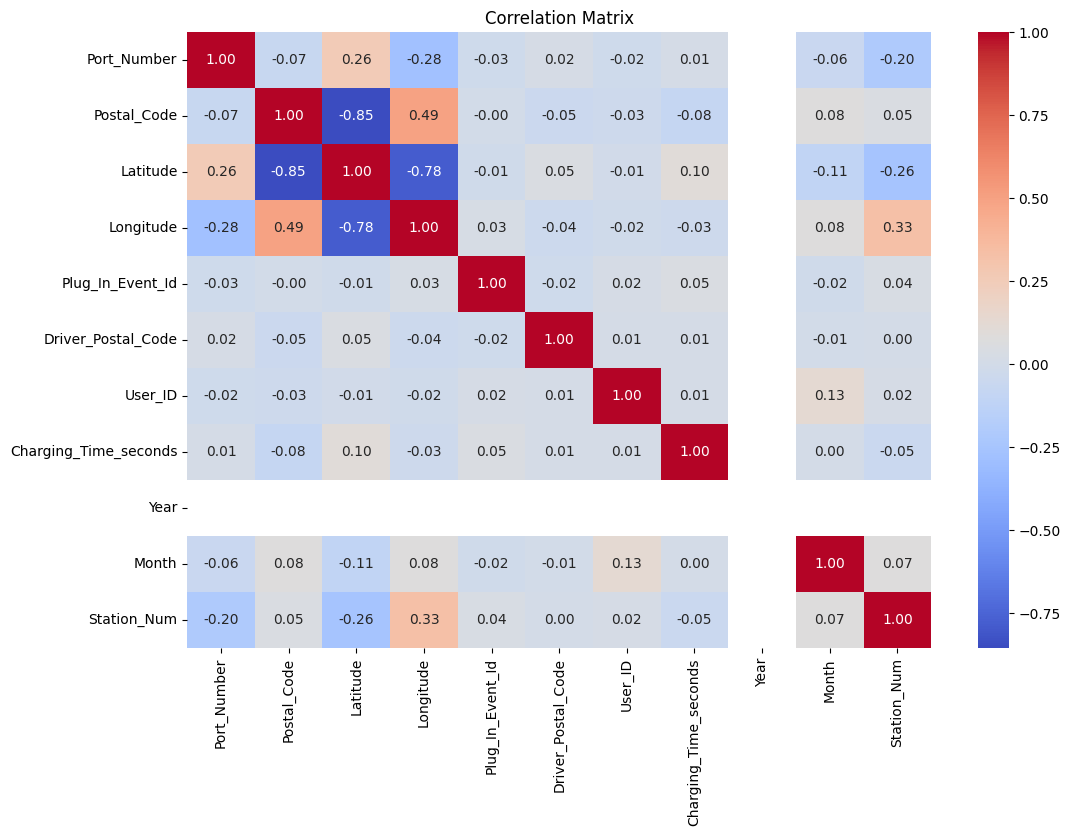

In [ ]:
# Generate correlation matrix, excluding non-numeric columns
correlation_matrix = df.select_dtypes(include=['number']).corr()
correlation_matrix

# prompt: # add heat map colors to the correlation matrix

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Linear Regression Analysis

### Prepare input

In [ ]:
df.columns

Index(['Station_Name', 'Start_Date', 'Port_Type', 'Port_Number', 'Plug_Type',
       'Address_1', 'Postal_Code', 'Latitude', 'Longitude', 'Ended_By',
       'Plug_In_Event_Id', 'Driver_Postal_Code', 'User_ID', 'Model_Number',
       'Charging_Time_seconds', 'Year', 'Month', 'Day_of_Week', 'Time_of_Day',
       'Station_Num'],
      dtype='object')

# **READ FIRST:**
**Modify dependent to pick which variables to use for linear regression**

In [ ]:
# Based on the picked columns list, generate string input for smf.ols with target as the independent variable
independent = 'Charging_Time_seconds'
dependent = [
  'Station_Name', 'Port_Type', 'Port_Number', 'Plug_Type',
  'Address_1', 'Postal_Code', 'Latitude', 'Longitude', 'Ended_By',
  'Plug_In_Event_Id', 'Driver_Postal_Code', 'User_ID',
  'Year', 'Month', 'Day_of_Week', 'Time_of_Day',
  'Station_Num', 'Model_Number'
]

# Generate smf.ols input string with ''
model_input = independent + ' ~ ' + ' + '.join(dependent)
model_input

'Charging_Time_seconds ~ Station_Name + Port_Type + Port_Number + Plug_Type + Address_1 + Postal_Code + Latitude + Longitude + Ended_By + Plug_In_Event_Id + Driver_Postal_Code + User_ID + Year + Month + Day_of_Week + Time_of_Day + Station_Num + Model_Number'

In [ ]:
# Get num of distinct values and dtype for all the dependent variables
for col in dependent:
  print(col, df[col].nunique(), df[col].dtype)

Station_Name 9 object
Port_Type 1 object
Port_Number 2 int64
Plug_Type 1 object
Address_1 10 object
Postal_Code 3 int64
Latitude 46 float64
Longitude 45 float64
Ended_By 8 object
Plug_In_Event_Id 11392 int64
Driver_Postal_Code 391 int64
User_ID 3908 int64
Year 1 int32
Month 12 int32
Day_of_Week 7 object
Time_of_Day 3 category
Station_Num 13 int64
Model_Number 10 object


### Linear Regression with most variables

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

# Use a fraction of df
# sample = df.sample(frac=0.1, random_state=42)

# Split the dataset into training and testing datasets
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

# Linear Regression
model = smf.ols(model_input, data=df_train).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Charging_Time_seconds   R-squared:                       0.062
Model:                               OLS   Adj. R-squared:                  0.059
Method:                    Least Squares   F-statistic:                     22.82
Date:                   Fri, 22 Nov 2024   Prob (F-statistic):          8.34e-156
Time:                           04:07:21   Log-Likelihood:            -1.3581e+05
No. Observations:                  13539   AIC:                         2.717e+05
Df Residuals:                      13499   BIC:                         2.720e+05
Df Model:                             39                                         
Covariance Type:               nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

### Linear Regression with selected variables

In [ ]:
# Based on the picked columns list, generate string input for smf.ols with target as the independent variable
independent = 'Charging_Time_seconds'
dependent = [
  'Station_Name', 'Port_Number',
  'Address_1', 'Latitude', 'Longitude',
  'Driver_Postal_Code', 'User_ID',
  'Year', 'Month', 'Day_of_Week', 'Time_of_Day',
  'Station_Num'
]

# Generate smf.ols input string with ''
model_input2 = independent + ' ~ ' + ' + '.join(dependent)
model_input2

'Charging_Time_seconds ~ Station_Name + Port_Number + Address_1 + Latitude + Longitude + Driver_Postal_Code + User_ID + Year + Month + Day_of_Week + Time_of_Day + Station_Num'

In [ ]:
# Check all disticn

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

# Use a fraction of df
# sample = df.sample(frac=0.1, random_state=42)

# Split the dataset into training and testing datasets
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

# Linear Regression
model2 = smf.ols(model_input2, data=df_train).fit()
print(model2.summary())

                              OLS Regression Results                             
Dep. Variable:     Charging_Time_seconds   R-squared:                       0.052
Model:                               OLS   Adj. R-squared:                  0.052
Method:                    Least Squares   F-statistic:                     158.5
Date:                   Fri, 22 Nov 2024   Prob (F-statistic):               0.00
Time:                           03:40:43   Log-Likelihood:            -7.4387e+05
No. Observations:                  75188   AIC:                         1.488e+06
Df Residuals:                      75161   BIC:                         1.488e+06
Df Model:                             26                                         
Covariance Type:               nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

TODO:

Filter data from 2018 to 2020
Split data to training (70%) and testing.

Logistic Regression.

# End of Second Dataset Analysis

# First Dataset Analysis



In [ ]:
!pip install opendatasets

import opendatasets as od

In [ ]:
# Download dataset to google colab
od.download('https://www.kaggle.com/datasets/valakhorasani/electric-vehicle-charging-patterns/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: allenywchiang
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/valakhorasani/electric-vehicle-charging-patterns


100%|██████████| 130k/130k [00:00<00:00, 23.1MB/s]

In [ ]:
import pandas as pd

df = pd.read_csv('/content/electric-vehicle-charging-patterns/ev_charging_patterns.csv')
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [ ]:
df.shape

(1320, 20)

In [ ]:
print(df.isna().sum())

User ID                                      0
Vehicle Model                                0
Battery Capacity (kWh)                       0
Charging Station ID                          0
Charging Station Location                    0
Charging Start Time                          0
Charging End Time                            0
Energy Consumed (kWh)                       66
Charging Duration (hours)                    0
Charging Rate (kW)                          66
Charging Cost (USD)                          0
Time of Day                                  0
Day of Week                                  0
State of Charge (Start %)                    0
State of Charge (End %)                      0
Distance Driven (since last charge) (km)    66
Temperature (°C)                             0
Vehicle Age (years)                          0
Charger Type                                 0
User Type                                    0
dtype: int64


In [ ]:
# prompt: See na count
# Drop na rows
df = df.dropna()

print(df.isna().sum())

User ID                                     0
Vehicle Model                               0
Battery Capacity (kWh)                      0
Charging Station ID                         0
Charging Station Location                   0
Charging Start Time                         0
Charging End Time                           0
Energy Consumed (kWh)                       0
Charging Duration (hours)                   0
Charging Rate (kW)                          0
Charging Cost (USD)                         0
Time of Day                                 0
Day of Week                                 0
State of Charge (Start %)                   0
State of Charge (End %)                     0
Distance Driven (since last charge) (km)    0
Temperature (°C)                            0
Vehicle Age (years)                         0
Charger Type                                0
User Type                                   0
dtype: int64


In [ ]:
df.shape

(1131, 20)

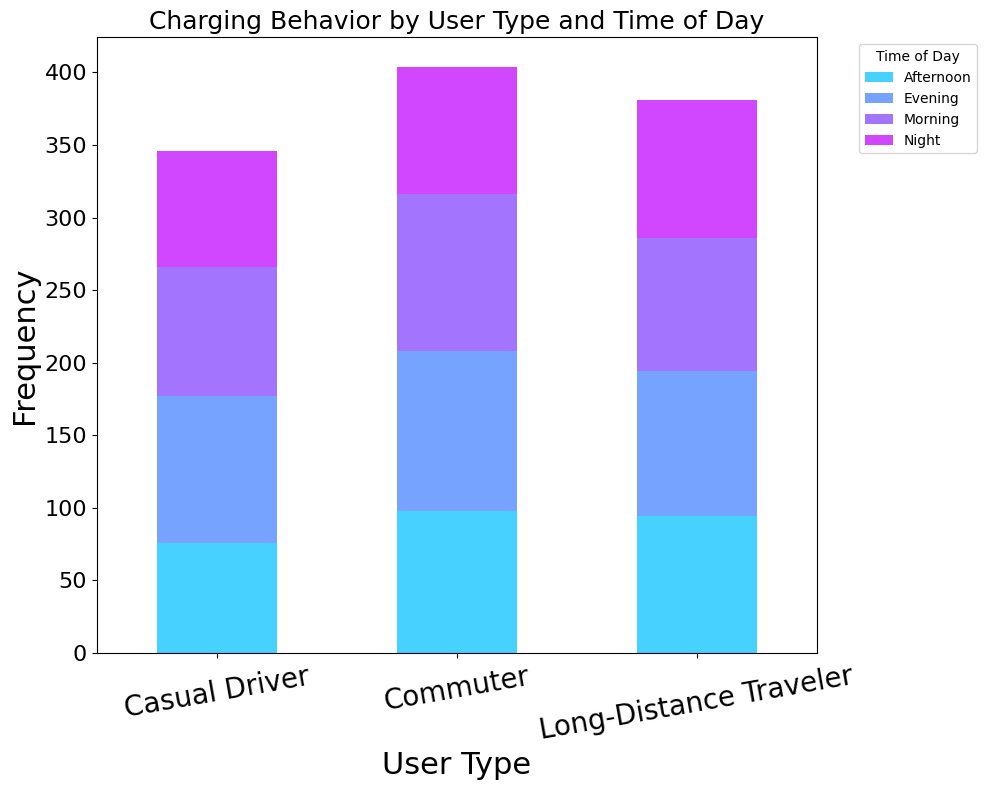

In [ ]:
import seaborn as sns

# 4. Stacked Bar Chart: Charging Behavior by User Type and Time of Day
user_type_time = df.groupby(['User Type', 'Time of Day']).size().unstack(fill_value=0)

# Custom cool color palette
cool_colors_palette = sns.color_palette("cool", len(user_type_time.columns))

user_type_time.plot(kind='bar', stacked=True, figsize=(10, 8), color=cool_colors_palette, alpha=0.9)
plt.title('Charging Behavior by User Type and Time of Day', fontsize=18)
plt.xlabel('User Type', fontsize=22)
plt.ylabel('Frequency', fontsize=22)
plt.xticks(fontsize=20, rotation=10)
plt.yticks(fontsize=16)
plt.legend(title='Time of Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


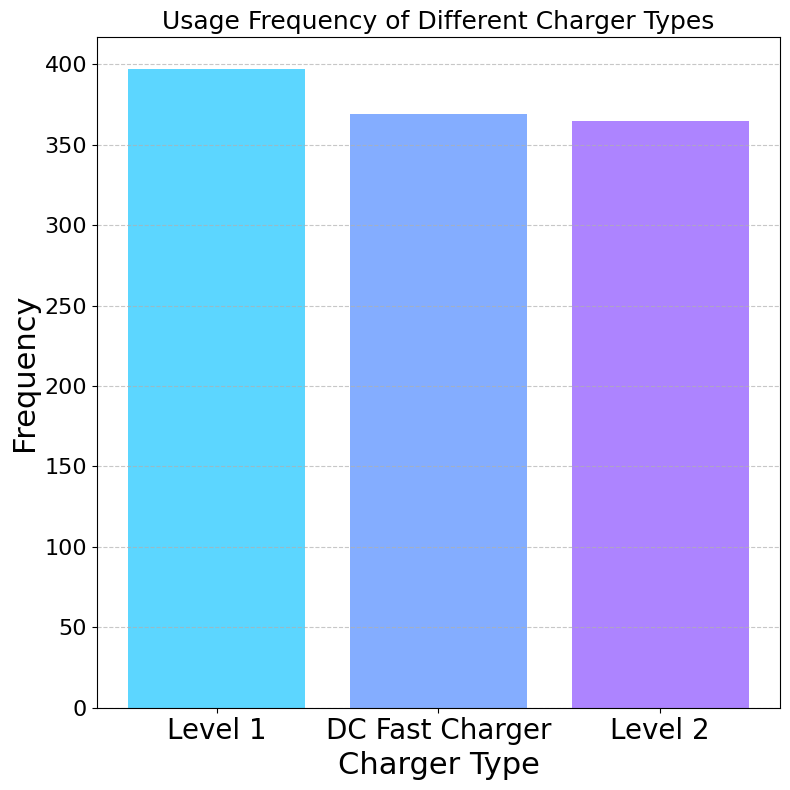

In [ ]:
import matplotlib.pyplot as plt

# Grouping data for charger type usage
charger_type_counts = df['Charger Type'].value_counts()

# Plotting the charger type usage as a bar chart
plt.figure(figsize=(8, 8))
plt.bar(charger_type_counts.index, charger_type_counts.values, color=cool_colors_palette, alpha=0.8)
plt.title('Usage Frequency of Different Charger Types', fontsize=18)
plt.xlabel('Charger Type', fontsize=22)
plt.ylabel('Frequency', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# prompt: show value and count for "Charging Station Location"

print(df['Charging Station Location'].value_counts())

Charging Station Location
Los Angeles      250
Houston          229
San Francisco    221
New York         220
Chicago          211
Name: count, dtype: int64


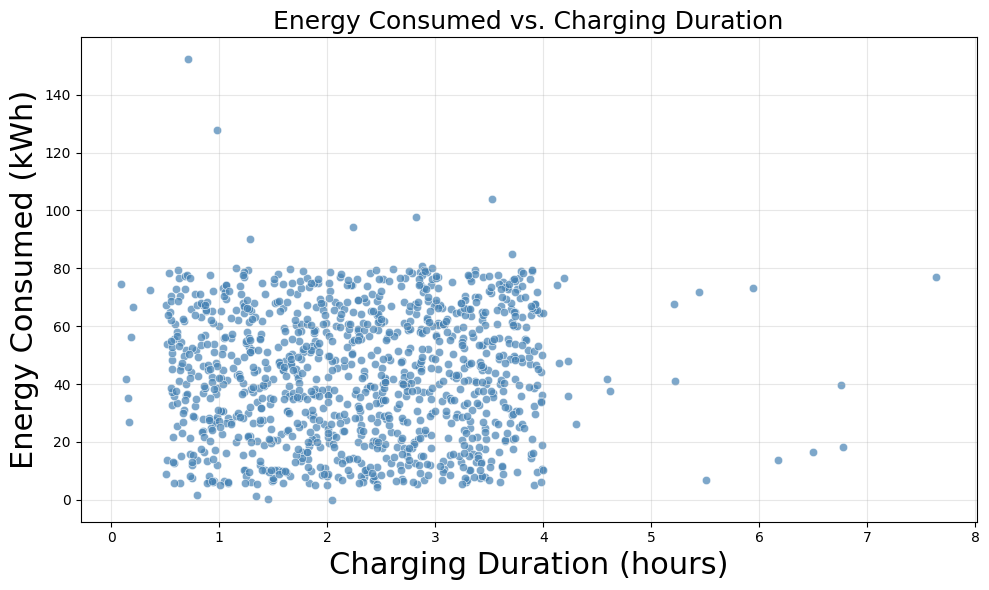

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Charging Duration (hours)', y='Energy Consumed (kWh)', alpha=0.7, color='#4682B4')
plt.title('Energy Consumed vs. Charging Duration', fontsize=18)
plt.xlabel('Charging Duration (hours)', fontsize=22)
plt.ylabel('Energy Consumed (kWh)', fontsize=22)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

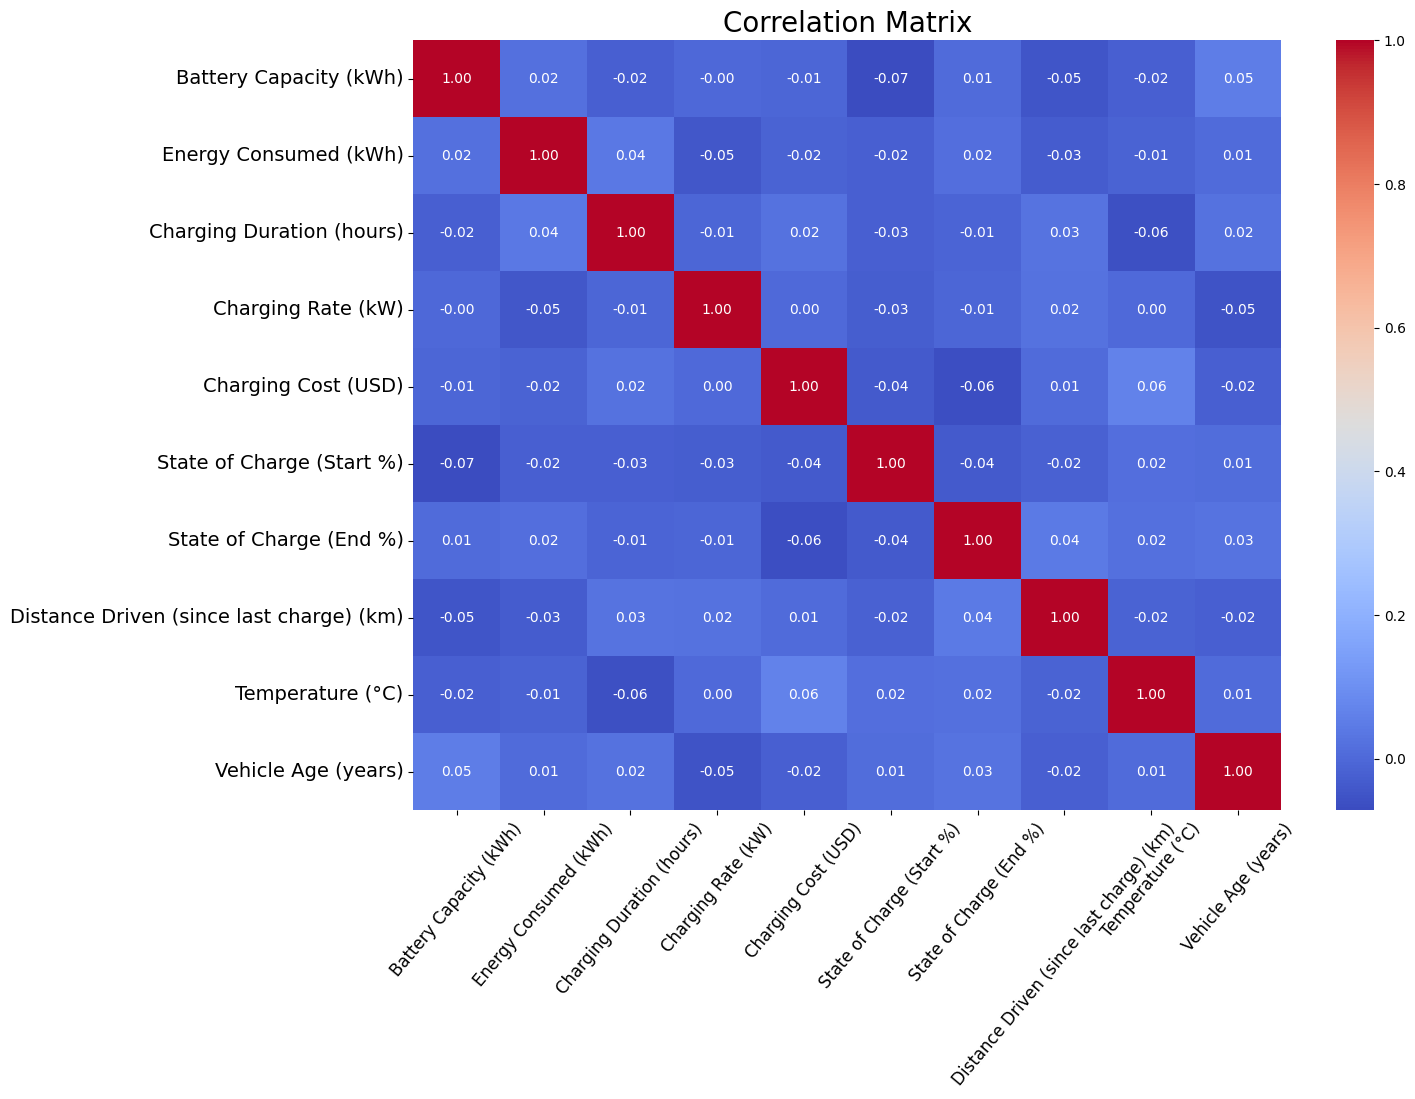

In [ ]:
# Generate correlation matrix, excluding non-numeric columns
correlation_matrix = df.select_dtypes(include=['number']).corr()
correlation_matrix

# prompt: # add heat map colors to the correlation matrix

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=12, rotation=50)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
import geopandas as gpd
import folium
from folium.plugins import HeatMap

# Simplified mapping of locations to coordinates for demonstration purposes
location_coords = {
    'San Francisco': [37.7749, -122.4194],
    'Los Angeles': [34.0522, -118.2437],
    'New York': [40.7128, -74.0060],
    'Houston': [29.7604, -95.3698],
    'Chicago': [41.8781, -87.6298]
}

# Add coordinates to the dataset
df['Coordinates'] = df['Charging Station Location'].map(location_coords)

# 1. Geo Map: Charging Station Frequency
geo_map = folium.Map(location=[39.8283, -98.5795], zoom_start=4)
station_counts = df['Charging Station Location'].value_counts()

for location, count in station_counts.items():
    if location in location_coords:
        folium.CircleMarker(
            location=location_coords[location],
            radius=count / 10,  # Scale radius for visibility
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            tooltip=f"{location}: {count} charges"
        ).add_to(geo_map)

# Save map to HTML file
# geo_map_file = '/mnt/data/geo_map.html'
# geo_map.save(geo_map_file)

# 2. Heatmap: Charging Station Usage
heatmap_data = [
    location_coords[loc] for loc in df['Charging Station Location'] if loc in location_coords
]

heat_map = folium.Map(location=[39.8283, -98.5795], zoom_start=4)
HeatMap(heatmap_data, radius=15).add_to(heat_map)

# Save heatmap to HTML file
# heatmap_file = '/mnt/data/heat_map.html'
# heat_map.save(heatmap_file)

geo_map, heat_map


(<folium.folium.Map at 0x7eb786fd6cb0>, <folium.folium.Map at 0x7eb786f58f40>)

In [ ]:
# prompt: Rename columns of df to remove any spaces and special characters that will not give PatsyError

import re

def rename_columns(df):
  new_columns = []
  for column in df.columns:
    new_column = re.sub('[^0-9a-zA-Z]+', '_', column)
    new_columns.append(new_column)
  df.columns = new_columns
  return df

df = rename_columns(df)

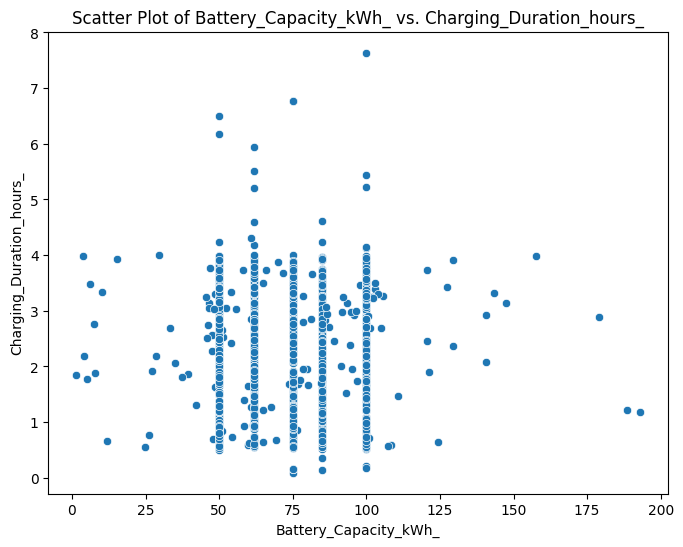

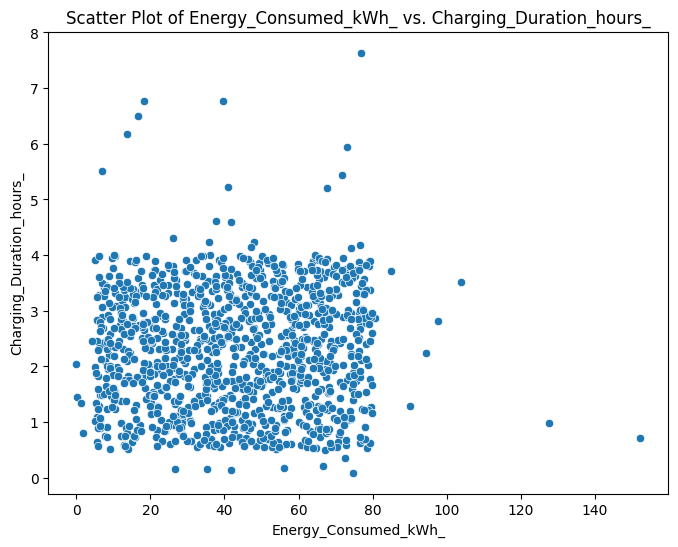

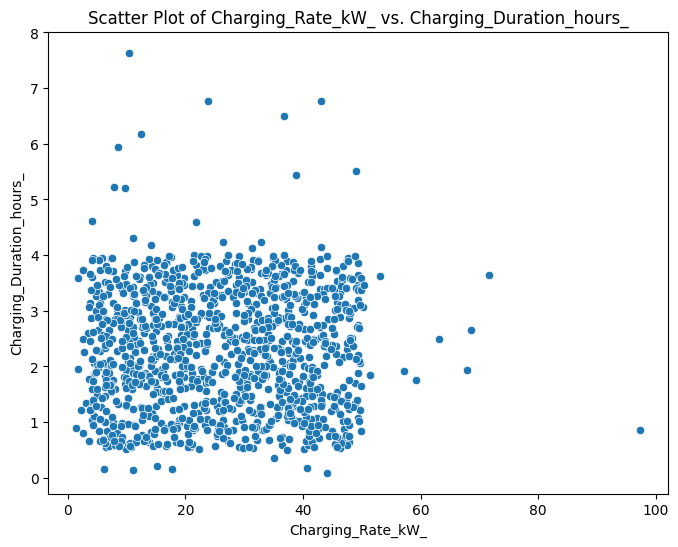

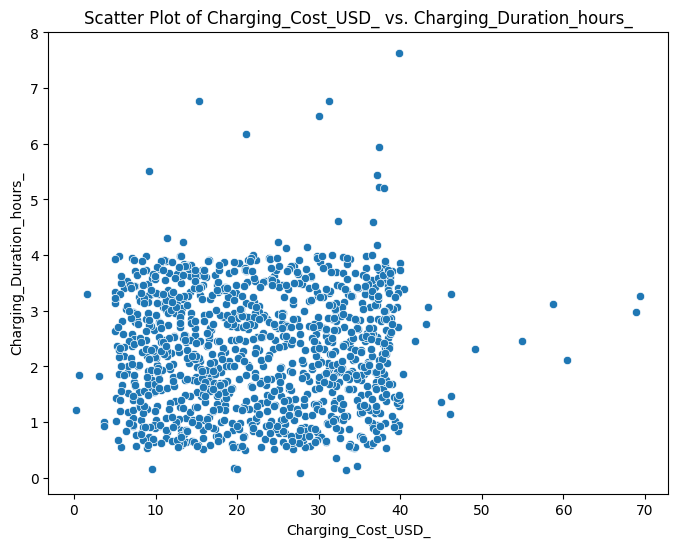

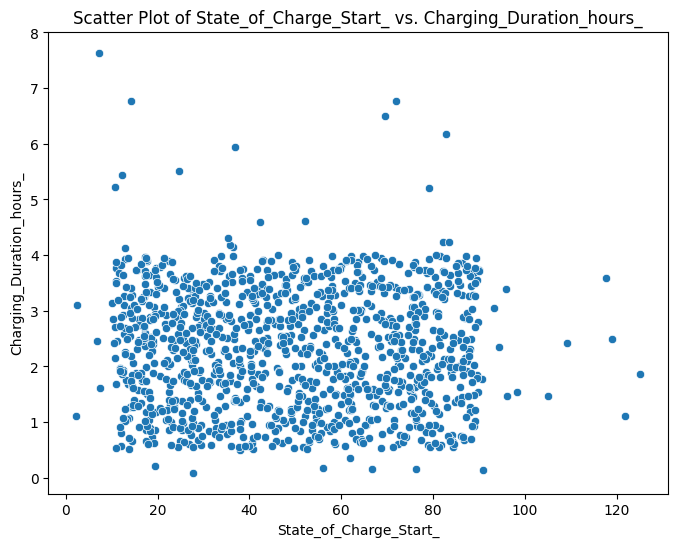

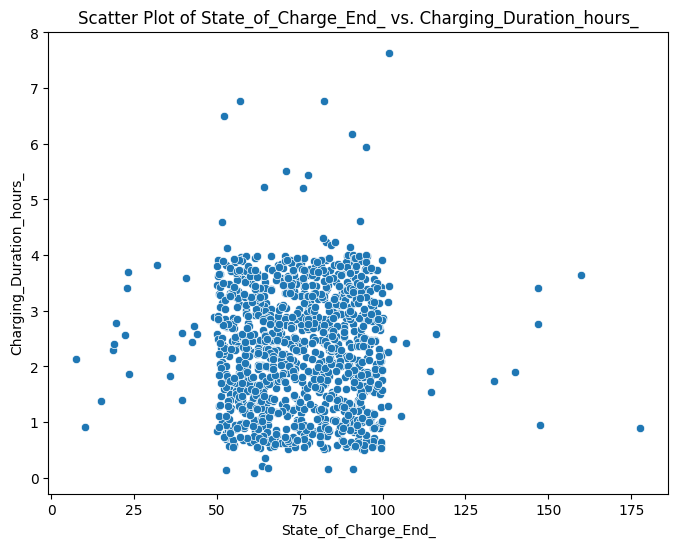

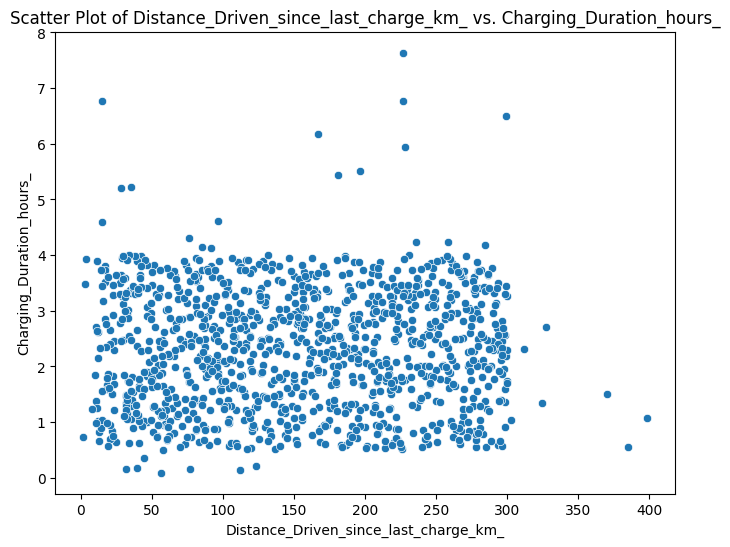

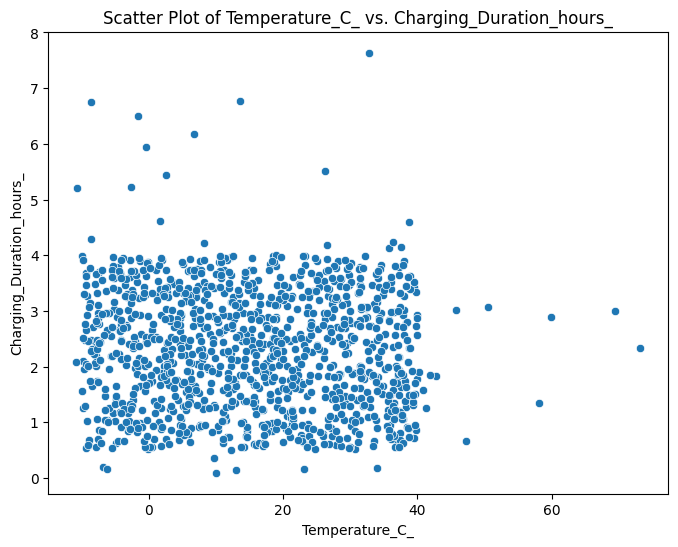

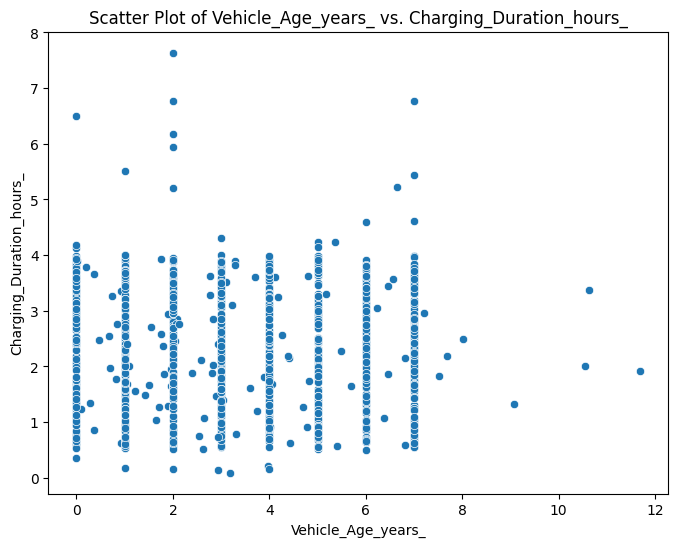

In [ ]:
# prompt: can you check non-linear relationship in the data

# Check for non-linear relationships using scatter plots
for col in df.select_dtypes(include=['number']).columns:
    if col != 'Charging_Duration_hours_':  # Exclude the target variable
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=col, y='Charging_Duration_hours_', data=df)
        plt.title(f'Scatter Plot of {col} vs. Charging_Duration_hours_')
        plt.show()

Looking at these scatter plots, there are signs that some variables might have non-linear relationships with charging duration:

Battery Capacity: It appears that the relationship with charging duration could be non-linear, as the data is scattered widely, with some clustering patterns at specific capacity values.

Charging Rate (kW): This plot suggests a non-linear relationship where charging duration decreases as charging rate increases, particularly at lower rates. Beyond a certain rate, the impact on duration seems to diminish.

Temperature (°C): The data shows high variation with temperature, and there's clustering around specific durations, which suggests possible non-linear effects. There seems to be no straightforward linear trend.

Energy Consumed: The spread of points in this plot is relatively even, with no strong linear trend, indicating that a non-linear relationship could be present here as well.

Charging Cost (USD): The points are scattered widely, particularly at lower durations, and don’t show a clear linear pattern, suggesting non-linearity.

Vehicle Age: There appears to be more clustering at certain vehicle ages, which might suggest a complex, potentially non-linear relationship.

Distance Driven: The points are widely spread, especially at higher distances, with no clear linear trend, suggesting a possible non-linear relationship.

Overall, the clustering patterns, spread, and lack of clear linear trends in several plots indicate that non-linear relationships might be present.

In [ ]:
# prompt: get all cols of df in string

cols_str = ', '.join(df.columns.tolist())
cols_str

# Rename all the columns to replace all whitespace with underscore
df.columns = df.columns.str.replace(' ', '_')
df.columns

# prompt: Get the columns in string format separating each comma with '+'

cols_str = '+'.join(df.columns.tolist())
cols_str

'User_ID+Vehicle_Model+Battery_Capacity_kWh_+Charging_Station_ID+Charging_Station_Location+Charging_Start_Time+Charging_End_Time+Energy_Consumed_kWh_+Charging_Duration_hours_+Charging_Rate_kW_+Charging_Cost_USD_+Time_of_Day+Day_of_Week+State_of_Charge_Start_+State_of_Charge_End_+Distance_Driven_since_last_charge_km_+Temperature_C_+Vehicle_Age_years_+Charger_Type+User_Type'

## First Model: Linear Regression on Most Variables

In [ ]:
# prompt: Make a linear regression model for df

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf

# Select features (X) and target (y)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

Model = smf.ols('Charging_Duration_hours_ ~ Vehicle_Model + Battery_Capacity_kWh_ + Charging_Station_ID + Charging_Station_Location + Energy_Consumed_kWh_ + Charging_Rate_kW_ + Time_of_Day + Day_of_Week + State_of_Charge_Start_ + State_of_Charge_End_ + Vehicle_Age_years_ + Charger_Type + User_Type', data=df_train)

Model_result = Model.fit()
print(Model_result.summary())

                               OLS Regression Results                               
Dep. Variable:     Charging_Duration_hours_   R-squared:                       0.528
Model:                                  OLS   Adj. R-squared:                 -0.027
Method:                       Least Squares   F-statistic:                    0.9511
Date:                      Fri, 22 Nov 2024   Prob (F-statistic):              0.691
Time:                              18:58:10   Log-Likelihood:                -860.60
No. Observations:                       791   AIC:                             2577.
Df Residuals:                           363   BIC:                             4577.
Df Model:                               427                                         
Covariance Type:                  nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

## Model 2: Linear Regression on Clustered Variables

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features relevant for clustering
station_features = df_train.groupby('Charging_Station_ID')[
    ['Charging_Rate_kW_','Energy_Consumed_kWh_', 'Charging_Duration_hours_']
    ].mean()

# Preserve the index before scaling
station_index = station_features.index

# Scale features for clustering
station_features = StandardScaler().fit_transform(station_features)

# Apply KMeans clustering
n_clusters = 10  # Adjust the number of clusters based on data
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Get cluster assignments for each station
station_clusters = kmeans.fit_predict(station_features)

# Create a mapping from Charging_Station_ID to cluster, using the preserved index
station_cluster_mapping = dict(zip(station_index, station_clusters))

# Assign clusters to df_train based on Charging_Station_ID
df_train['Station_Cluster'] = df_train['Charging_Station_ID'].map(
    station_cluster_mapping
    )

# Optional: Check cluster assignment counts
print(df_train['Station_Cluster'].value_counts())

Station_Cluster
0    154
6     97
2     97
7     76
5     73
8     71
3     70
1     65
9     59
4     29
Name: count, dtype: int64


In [ ]:
# Update the formula to use Station_Cluster
Model_1 = smf.ols('Charging_Duration_hours_ ~ Vehicle_Model + \
                  Battery_Capacity_kWh_ + Station_Cluster + \
                  Charging_Station_Location + Energy_Consumed_kWh_ + \
                  Charging_Rate_kW_ + Time_of_Day + Day_of_Week + \
                  State_of_Charge_Start_ + State_of_Charge_End_ + \
                  Vehicle_Age_years_ + Charger_Type + User_Type', data=df_train)

# Fit the updated model
Model_1_result = Model_1.fit()
print(Model_1_result.summary())

                               OLS Regression Results                               
Dep. Variable:     Charging_Duration_hours_   R-squared:                       0.041
Model:                                  OLS   Adj. R-squared:                  0.006
Method:                       Least Squares   F-statistic:                     1.159
Date:                      Fri, 22 Nov 2024   Prob (F-statistic):              0.261
Time:                              18:58:11   Log-Likelihood:                -1141.1
No. Observations:                       791   AIC:                             2340.
Df Residuals:                           762   BIC:                             2476.
Df Model:                                28                                         
Covariance Type:                  nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

## Model 3: Removing Certain Variables based on p-values

### Removed Station Cluster

In [ ]:
# remove variable 1 by 1

#removed 'station cluster'

Model_2 = smf.ols('Charging_Duration_hours_ ~ Vehicle_Model + Battery_Capacity_kWh_ + Charging_Station_Location + Energy_Consumed_kWh_ + Charging_Rate_kW_ + Time_of_Day + Day_of_Week + State_of_Charge_Start_ + State_of_Charge_End_ + Vehicle_Age_years_ + Charger_Type + User_Type', data=df_train)

# Fit the updated model
Model_2_result = Model_2.fit()
print(Model_2_result.summary())

                               OLS Regression Results                               
Dep. Variable:     Charging_Duration_hours_   R-squared:                       0.041
Model:                                  OLS   Adj. R-squared:                  0.007
Method:                       Least Squares   F-statistic:                     1.204
Date:                      Fri, 22 Nov 2024   Prob (F-statistic):              0.219
Time:                              18:58:11   Log-Likelihood:                -1141.1
No. Observations:                       791   AIC:                             2338.
Df Residuals:                           763   BIC:                             2469.
Df Model:                                27                                         
Covariance Type:                  nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

### Removed Charging Rate

In [ ]:
#removed 'charging rate'

Model_3 = smf.ols('Charging_Duration_hours_ ~ Vehicle_Model + Battery_Capacity_kWh_ + Charging_Station_Location + Energy_Consumed_kWh_ + Time_of_Day + Day_of_Week + State_of_Charge_Start_ + State_of_Charge_End_ + Vehicle_Age_years_ + Charger_Type + User_Type', data=df_train)

# Fit the updated model
Model_3_result = Model_3.fit()
print(Model_3_result.summary())

                               OLS Regression Results                               
Dep. Variable:     Charging_Duration_hours_   R-squared:                       0.041
Model:                                  OLS   Adj. R-squared:                  0.008
Method:                       Least Squares   F-statistic:                     1.251
Date:                      Fri, 22 Nov 2024   Prob (F-statistic):              0.182
Time:                              18:58:11   Log-Likelihood:                -1141.1
No. Observations:                       791   AIC:                             2336.
Df Residuals:                           764   BIC:                             2462.
Df Model:                                26                                         
Covariance Type:                  nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

### Removed State of Charge End

In [ ]:
#removed State_of_Charge_End_

Model_4 = smf.ols('Charging_Duration_hours_ ~ Vehicle_Model + Battery_Capacity_kWh_ + Charging_Station_Location + Energy_Consumed_kWh_ + Time_of_Day + Day_of_Week + State_of_Charge_Start_ + Vehicle_Age_years_ + Charger_Type + User_Type', data=df_train)

# Fit the updated model
Model_4_result = Model_4.fit()
print(Model_4_result.summary())

                               OLS Regression Results                               
Dep. Variable:     Charging_Duration_hours_   R-squared:                       0.041
Model:                                  OLS   Adj. R-squared:                  0.009
Method:                       Least Squares   F-statistic:                     1.303
Date:                      Fri, 22 Nov 2024   Prob (F-statistic):              0.148
Time:                              18:58:11   Log-Likelihood:                -1141.1
No. Observations:                       791   AIC:                             2334.
Df Residuals:                           765   BIC:                             2456.
Df Model:                                25                                         
Covariance Type:                  nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

### Removed Day of Week

In [ ]:
#removed Day of week

Model_5 = smf.ols('Charging_Duration_hours_ ~ Vehicle_Model + Battery_Capacity_kWh_ + Charging_Station_Location + Energy_Consumed_kWh_ + Time_of_Day + State_of_Charge_Start_ + Vehicle_Age_years_ + Charger_Type + User_Type', data=df_train)

# Fit the updated model
Model_5_result = Model_5.fit()
print(Model_5_result.summary())

                               OLS Regression Results                               
Dep. Variable:     Charging_Duration_hours_   R-squared:                       0.036
Model:                                  OLS   Adj. R-squared:                  0.012
Method:                       Least Squares   F-statistic:                     1.494
Date:                      Fri, 22 Nov 2024   Prob (F-statistic):             0.0800
Time:                              18:58:11   Log-Likelihood:                -1143.3
No. Observations:                       791   AIC:                             2327.
Df Residuals:                           771   BIC:                             2420.
Df Model:                                19                                         
Covariance Type:                  nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

### Removed Time of Day

In [ ]:
#removed Time of Day

Model_6 = smf.ols('Charging_Duration_hours_ ~ Vehicle_Model + Battery_Capacity_kWh_ + Charging_Station_Location + Energy_Consumed_kWh_ + State_of_Charge_Start_ + Vehicle_Age_years_ + Charger_Type + User_Type', data=df_train)

# Fit the updated model
Model_6_result = Model_6.fit()
print(Model_6_result.summary())

                               OLS Regression Results                               
Dep. Variable:     Charging_Duration_hours_   R-squared:                       0.031
Model:                                  OLS   Adj. R-squared:                  0.011
Method:                       Least Squares   F-statistic:                     1.570
Date:                      Fri, 22 Nov 2024   Prob (F-statistic):             0.0707
Time:                              18:58:11   Log-Likelihood:                -1144.9
No. Observations:                       791   AIC:                             2324.
Df Residuals:                           774   BIC:                             2403.
Df Model:                                16                                         
Covariance Type:                  nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

## Model 4: Linear Regression with Interaction Terms

### **Explanation of changes below**:
Interaction terms: I’ve added interaction terms between Vehicle_Model and Energy_Consumed_kWh_, Vehicle_Model and Charging_Rate_kW_, and Charging_Station_ID and Time_of_Day. These interactions will allow the model to capture more complex relationships between these features and the target variable.

Retention of existing features: I’ve kept all other features from your original model intact to ensure consistency.

Fit and display: The model is fitted to df_train, and the summary is printed to evaluate improvements.

Adding interaction terms can help uncover deeper relationships and improve model performance if these relationships are significant. You can also test other combinations of interactions based on domain knowledge or exploratory data analysis.

In [ ]:
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

# Adding interaction terms between variables
Model_1_improved = smf.ols(
    'Charging_Duration_hours_ ~ Vehicle_Model * Energy_Consumed_kWh_ + '
    'Vehicle_Model * Charging_Rate_kW_ + Charging_Station_ID * Time_of_Day + '
    'Battery_Capacity_kWh_ + Charging_Station_Location + Day_of_Week + '
    'State_of_Charge_Start_ + State_of_Charge_End_ + Vehicle_Age_years_ + '
    'Charger_Type + User_Type',
    data=df_train
)

# Fit the model and display the summary
Model_1_improved_result = Model_1_improved.fit()
print(Model_1_improved_result.summary())

                               OLS Regression Results                               
Dep. Variable:     Charging_Duration_hours_   R-squared:                       0.885
Model:                                  OLS   Adj. R-squared:                 -0.003
Method:                       Least Squares   F-statistic:                    0.9971
Date:                      Fri, 22 Nov 2024   Prob (F-statistic):              0.523
Time:                              18:58:15   Log-Likelihood:                -303.84
No. Observations:                       791   AIC:                             2008.
Df Residuals:                            91   BIC:                             5279.
Df Model:                               699                                         
Covariance Type:                  nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------

## Model 5: GLM model

### **Interpretation and Recommendations:**

Statistical Significance:

Many predictors (e.g., vehicle model, time of day, charging station location, and day of the week) do not show statistical significance, which might imply that they do not have a meaningful effect on the charging duration. You may consider removing some of these predictors to simplify the model.
Model Improvements:

Consider testing different models, such as adding non-linear terms (e.g., quadratic terms) or using other forms of regression like Ridge or Lasso to address multicollinearity.
The negative adjusted R-squared suggests that the model might be overfitting the data, or some predictors are not adding value. Reducing the number of features or using feature selection techniques could help.
Significant Variables:

User_Type and certain Vehicle_Model interaction terms (with Energy_Consumed_kWh_) are the most significant variables. Exploring these factors in more detail could provide insights into how specific user types and energy consumption affect charging durations.
F-statistic and Adjusted R-squared:

The F-statistic being low (0.9971) with a high p-value (0.523) suggests that the model may not be the best fit. It might be worthwhile to try alternative models or transformations of the predictors.
In conclusion, while the model explains a good amount of variance, there are several factors that do not appear to be significantly contributing to the prediction of charging duration, and further refinement may be needed.

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Specifying a GLM with a Gamma distribution and log link
glm_model = smf.glm(
    'Charging_Duration_hours_ ~ Vehicle_Model * Energy_Consumed_kWh_ + '
    'Vehicle_Model * Charging_Rate_kW_ + Charging_Station_ID * Time_of_Day + '
    'Battery_Capacity_kWh_ + Charging_Station_Location + Day_of_Week + '
    'State_of_Charge_Start_ + State_of_Charge_End_ + Vehicle_Age_years_ + '
    'Charger_Type + User_Type',
    data=df_train,
    family=sm.families.Gamma(link=sm.families.links.log())
)

# Fit the model
glm_result = glm_model.fit()
print(glm_result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


                    Generalized Linear Model Regression Results                     
Dep. Variable:     Charging_Duration_hours_   No. Observations:                  791
Model:                                  GLM   Df Residuals:                       91
Model Family:                         Gamma   Df Model:                          699
Link Function:                          log   Scale:                         0.23097
Method:                                IRLS   Log-Likelihood:                -776.69
Date:                      Wed, 20 Nov 2024   Deviance:                       24.744
Time:                              20:46:57   Pearson chi2:                     21.0
No. Iterations:                         100   Pseudo R-squ. (CS):             0.6212
Covariance Type:                  nonrobust                                         
                                                                coef    std err          z      P>|z|      [0.025      0.975]
------------------------

### **GLM model**

To assess whether the model is good, we can evaluate several aspects based on the outputs provided:

Key Metrics:
Pseudo R-squared:

Value: 0.6212
Interpretation: This suggests that the model explains about 62.12% of the variance in the outcome. While this is a decent fit, it's not exceptionally high. In many cases, especially in fields like economics and social sciences, a pseudo R-squared value around 0.6 or above is often considered acceptable. However, it suggests that there may still be factors not accounted for by the model.

Deviance:

Value: 24.744
Interpretation: Deviance measures the goodness of fit for a model. Lower deviance indicates better fit, so this value suggests that the model does not explain all the variability, but it’s still performing reasonably well.

Pearson Chi-square:

Value: 21.0
Interpretation: This is another measure of model fit. A lower chi-square statistic indicates a better fit between the model and observed data. While this is not unusually large, it suggests the model is not perfect.

Significance of Predictors:

The significance of predictors like Energy Consumed (p=0.001) and the interaction terms (like Vehicle Model and Energy Consumed) suggests that the model is capturing meaningful relationships in the data.
Non-significant predictors (like Charging Rate, Battery Capacity, etc.) imply that the model may not need to include those variables for better prediction, or their effect is too weak.

Potential Improvements:
Additional Variables: The model could potentially improve by including more features or interactions, especially around user type, location, and time of day (if available), which were non-significant in the current model.

Higher R-squared: Although a value of 0.6212 is acceptable, depending on the context and expectations, it may be worth exploring more sophisticated models (e.g., using machine learning techniques) to improve the explanatory power.
Outliers/Influence: If there are influential data points (outliers or leverage points), these could skew the model fit. Diagnosing this could improve model quality.

Conclusion:
The model is moderately good but may benefit from additional features, fine-tuning, or exploring other modeling techniques.
The pseudo R-squared of 0.6212 indicates a good fit overall, but there’s room for improvement, especially if higher accuracy is needed.

## **Key Insights:**

Energy_Consumed_kWh_:

Significant Negative Impact: Vehicle models, including Chevy Bolt, Hyundai Kona, Nissan Leaf, and Tesla Model 3, all show negative coefficients for energy consumption (Energy_Consumed_kWh_), suggesting that these vehicles consume less energy relative to the baseline vehicle model.
The p-values for these variables are <0.05, making them statistically significant.
Interpretation: The coefficients for each vehicle model represent the reduction in energy consumption compared to the baseline (likely a reference vehicle model).
Charging_Rate_kW_:

Not Significant: The main charging rate variable has a very high p-value (0.402), which suggests that charging rate has no significant impact on energy consumption in this regression model.
The individual vehicle model interactions with charging rate also have high p-values, indicating that the charging rate doesn’t significantly affect energy consumption when controlled for different vehicle types.
Battery_Capacity_kWh_:

Not Significant: The coefficient for battery capacity is very small (0.0020) and has a p-value of 0.362, indicating that battery capacity does not significantly contribute to explaining variations in energy consumption.
State_of_Charge_Start_ and State_of_Charge_End_:

Not Significant: Both the initial and final states of charge have high p-values (0.978 and 0.423, respectively), suggesting that state of charge does not meaningfully explain the variation in energy consumption.
Vehicle_Age_years_:

Not Significant: Vehicle age also has a high p-value (0.735), indicating that age of the vehicle does not significantly influence energy consumption.
Time_of_Day[T.Night]:

No Effect: The variable Time_of_Day[T.Night] has a coefficient of 0, indicating that the time of day does not significantly influence energy consumption compared to the reference time (likely daytime).
Summary:
Significant Variables: Vehicle model types (Chevy Bolt, Hyundai Kona, Nissan Leaf, Tesla Model 3) have a significant negative impact on energy consumption.
Non-Significant Variables: Charging rate, battery capacity, state of charge, vehicle age, and time of day have no significant effect on energy consumption, as indicated by high p-values and/or small coefficients.
These insights suggest that the key factors influencing energy consumption are the specific vehicle model rather than external factors like charging rate or battery capacity.

## **Conclusion:**
The OLS model shows a strong fit overall (R-squared = 0.885), but potential issues like multicollinearity and significant p-values on several predictors suggest that some of the variables may not be meaningful. If there are concerns about residual behavior (e.g., non-normality, heteroscedasticity), a GLM could offer better predictive power and robustness, depending on the distribution of your data.

## Model 6: Try simulations

In [ ]:
import pandas as pd
import numpy as np

# Simulate 5000 additional rows for the dataset
def simulate_data(df, num_rows=8869):
    simulated_data = df.sample(num_rows, replace=True, random_state=42).reset_index(drop=True)

    # Add small random variations to numerical columns to create diversity
    for col in df.select_dtypes(include=['float64']).columns:
        simulated_data[col] += np.random.normal(0, simulated_data[col].std() * 0.1, size=num_rows)

    # Ensure variations remain within realistic bounds for specific columns
    simulated_data['State_of_Charge_Start_'] = np.clip(simulated_data['State_of_Charge_Start_'], 0, 100)
    simulated_data['State_of_Charge_End_'] = np.clip(simulated_data['State_of_Charge_End_'], 0, 100)

    return simulated_data

# Generate simulated data and combine it with the original dataset
df_simulated = simulate_data(df, num_rows=8869)
df_sim = pd.concat([df, df_simulated], ignore_index=True)

# Verify the combined dataset
print(df_sim.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   User_ID                                10000 non-null  object 
 1   Vehicle_Model                          10000 non-null  object 
 2   Battery_Capacity_kWh_                  10000 non-null  float64
 3   Charging_Station_ID                    10000 non-null  object 
 4   Charging_Station_Location              10000 non-null  object 
 5   Charging_Start_Time                    10000 non-null  object 
 6   Charging_End_Time                      10000 non-null  object 
 7   Energy_Consumed_kWh_                   10000 non-null  float64
 8   Charging_Duration_hours_               10000 non-null  float64
 9   Charging_Rate_kW_                      10000 non-null  float64
 10  Charging_Cost_USD_                     10000 non-null  float64
 11  Tim

In [ ]:
df_sim.head()

,User_ID,Vehicle_Model,Battery_Capacity_kWh_,Charging_Station_ID,Charging_Station_Location,Charging_Start_Time,Charging_End_Time,Energy_Consumed_kWh_,Charging_Duration_hours_,Charging_Rate_kW_,Charging_Cost_USD_,Time_of_Day,Day_of_Week,State_of_Charge_Start_,State_of_Charge_End_,Distance_Driven_since_last_charge_km_,Temperature_C_,Vehicle_Age_years_,Charger_Type,User_Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [ ]:
df_sim.shape

(10000, 20)

### Linear Regression on Most Variables: Simulated Dataset

In [ ]:
# Select features (X) and target (y)
df_sim_train, df_sim_test = train_test_split(
  df_sim, test_size=0.3, random_state=42)

Model_sim = smf.ols('Charging_Duration_hours_ ~ Vehicle_Model + \
                    Battery_Capacity_kWh_ + Charging_Station_ID + \
                    Charging_Station_Location + Energy_Consumed_kWh_ + \
                    Charging_Rate_kW_ + Time_of_Day + Day_of_Week + \
                    State_of_Charge_Start_ + State_of_Charge_End_ + \
                    Vehicle_Age_years_ + Charger_Type + User_Type',
                    data=df_sim_train)

Model_sim_result = Model_sim.fit()
print(Model_sim_result.summary())

                               OLS Regression Results                               
Dep. Variable:     Charging_Duration_hours_   R-squared:                       0.417
Model:                                  OLS   Adj. R-squared:                  0.375
Method:                       Least Squares   F-statistic:                     9.881
Date:                      Fri, 22 Nov 2024   Prob (F-statistic):               0.00
Time:                              18:58:30   Log-Likelihood:                -8586.6
No. Observations:                      7000   AIC:                         1.812e+04
Df Residuals:                          6527   BIC:                         2.136e+04
Df Model:                               472                                         
Covariance Type:                  nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

### Linear Regression on Simulated Data: Removed State of Charge End

In [ ]:
# removed State_of_Charge_End_

Model_1_sim = smf.ols('Charging_Duration_hours_ ~ Vehicle_Model + Battery_Capacity_kWh_ + Charging_Station_ID + Charging_Station_Location + Energy_Consumed_kWh_ + Charging_Rate_kW_ + Time_of_Day + Day_of_Week + State_of_Charge_Start_ + Vehicle_Age_years_ + Charger_Type + User_Type', data=df_sim_train)

Model_1_sim_result = Model_1_sim.fit()
print(Model_1_sim_result.summary())

                               OLS Regression Results                               
Dep. Variable:     Charging_Duration_hours_   R-squared:                       0.417
Model:                                  OLS   Adj. R-squared:                  0.375
Method:                       Least Squares   F-statistic:                     9.902
Date:                      Fri, 22 Nov 2024   Prob (F-statistic):               0.00
Time:                              18:58:36   Log-Likelihood:                -8586.9
No. Observations:                      7000   AIC:                         1.812e+04
Df Residuals:                          6528   BIC:                         2.135e+04
Df Model:                               471                                         
Covariance Type:                  nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

### GLM Model on Simulated Data

In [ ]:
# Specifying a GLM with a Gamma distribution and log link

glm_model_sim = smf.glm(
    'Charging_Duration_hours_ ~ Vehicle_Model * Energy_Consumed_kWh_ + '
    'Vehicle_Model * Charging_Rate_kW_ + Charging_Station_ID * Time_of_Day + '
    'Battery_Capacity_kWh_ + Charging_Station_Location + Day_of_Week + '
    'State_of_Charge_Start_ + State_of_Charge_End_ + Vehicle_Age_years_ + '
    'Charger_Type + User_Type',
    data=df_sim_train,
    family=sm.families.Gamma(link=sm.families.links.log())
)

# Fit the model
glm_result_sim = glm_model_sim.fit()
print(glm_result_sim.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:812: RuntimeWarning: invalid value encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)


                    Generalized Linear Model Regression Results                     
Dep. Variable:     Charging_Duration_hours_   No. Observations:                 7000
Model:                                  GLM   Df Residuals:                     6080
Model Family:                         Gamma   Df Model:                          919
Link Function:                          log   Scale:                        0.057794
Method:                                IRLS   Log-Likelihood:                    nan
Date:                      Wed, 20 Nov 2024   Deviance:                       493.83
Time:                              20:58:36   Pearson chi2:                     351.
No. Iterations:                         100   Pseudo R-squ. (CS):                nan
Covariance Type:                  nonrobust                                         
                                                                coef    std err          z      P>|z|      [0.025      0.975]
------------------------

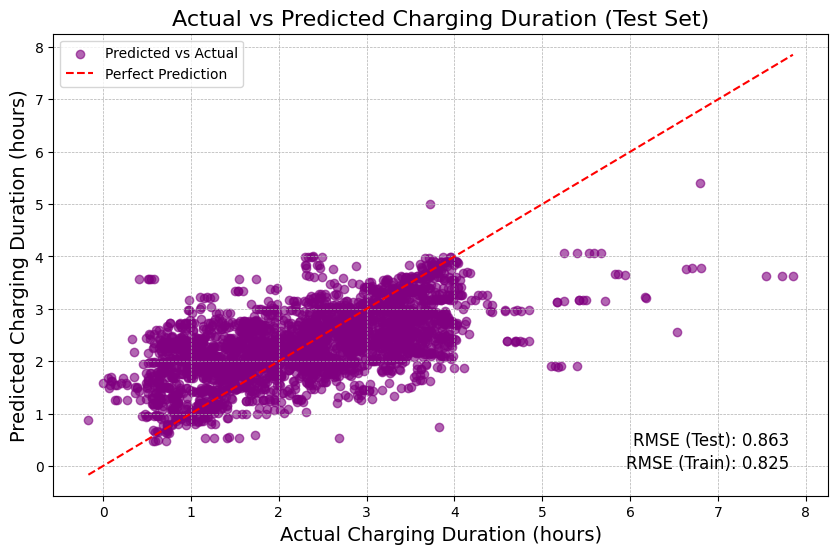

RMSE for Training Set: 0.825113037741676
RMSE for Test Set: 0.863135638972268


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Generate predictions for the test set
df_sim_pred_test = Model_1_sim_result.predict(df_sim_test)

# Actual values (Charging_Duration_hours_) from the test set
actual_values_test = df_sim_test['Charging_Duration_hours_']

# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(actual_values_test, df_sim_pred_test, alpha=0.6, color='purple', label='Predicted vs Actual')

# Plot the perfect prediction line
plt.plot([min(actual_values_test), max(actual_values_test)],
         [min(actual_values_test), max(actual_values_test)],
         color='red', linestyle='--', label='Perfect Prediction')

# Calculate RMSE for the training and test sets
df_sim_pred_train = Model_1_sim_result.predict(df_sim_train)
rmse_train = np.sqrt(mean_squared_error(df_sim_train['Charging_Duration_hours_'], df_sim_pred_train))
rmse_test = np.sqrt(mean_squared_error(actual_values_test, df_sim_pred_test))

# Display RMSE values on the graph (bottom-right corner)
plt.text(0.95, 0.05, f"RMSE (Train): {rmse_train:.3f}", transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='bottom', horizontalalignment='right', color='black')
plt.text(0.95, 0.1, f"RMSE (Test): {rmse_test:.3f}", transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='bottom', horizontalalignment='right', color='black')

# Labels and Title
plt.xlabel('Actual Charging Duration (hours)', fontsize=14)
plt.ylabel('Predicted Charging Duration (hours)', fontsize=14)
plt.title('Actual vs Predicted Charging Duration (Test Set)', fontsize=16)

# Place the legend in the top-left corner
plt.legend(loc='upper left')

# Add gridlines for better visualization
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()

# Print the RMSE values in the console
print(f"RMSE for Training Set: {rmse_train}")
print(f"RMSE for Test Set: {rmse_test}")


## Model 7: Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Features and target
features = ['Vehicle_Model', 'Battery_Capacity_kWh_', 'Charging_Station_ID',
            'Charging_Station_Location',
            'Charging_Rate_kW_', 'Time_of_Day', 'Day_of_Week',
            'State_of_Charge_Start_', 'Vehicle_Age_years_', 'Charger_Type',
            'User_Type'
            ]
target = 'Charging_Duration_hours_'

# Split the dataset
df_sim_train, df_sim_test = train_test_split(df_sim, test_size=0.3, random_state=42)

X_train = df_sim_train[features]
y_train = df_sim_train[target]
X_test = df_sim_test[features]
y_test = df_sim_test[target]

# Define categorical and numerical features
categorical_features = ['Vehicle_Model', 'Charging_Station_Location', 'Time_of_Day',
                        'Day_of_Week', 'Charger_Type', 'User_Type']
numerical_features = ['Battery_Capacity_kWh_',
                      'Charging_Rate_kW_', 'State_of_Charge_Start_', 'Vehicle_Age_years_']

# Preprocess data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),  # Leave numerical features as is
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Transform training and test data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Initialize and train the Random Forest Regressor
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions on the test set
predictions = model_rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 0.20301167031743467
R2 Score: 0.9214518344668846


1. Mean Absolute Error (MAE)

	•	Value: 0.204
	•	Interpretation:
	•	On average, your model’s predictions are off by approximately 0.204 hours (around 12 minutes).
	•	Whether this is good or not depends on the scale of the target variable (Charging_Duration_hours_). If the typical range of charging duration is much larger (e.g., 2-10 hours), this is a very small error and indicates good performance.

2. R² Score

	•	Value: 0.921
	•	Interpretation:
	•	An R² value of 0.921 means that your model explains 92.1% of the variance in the target variable (Charging_Duration_hours_).
	•	This is excellent for a regression model, as it indicates that your model captures most of the variability in the data.


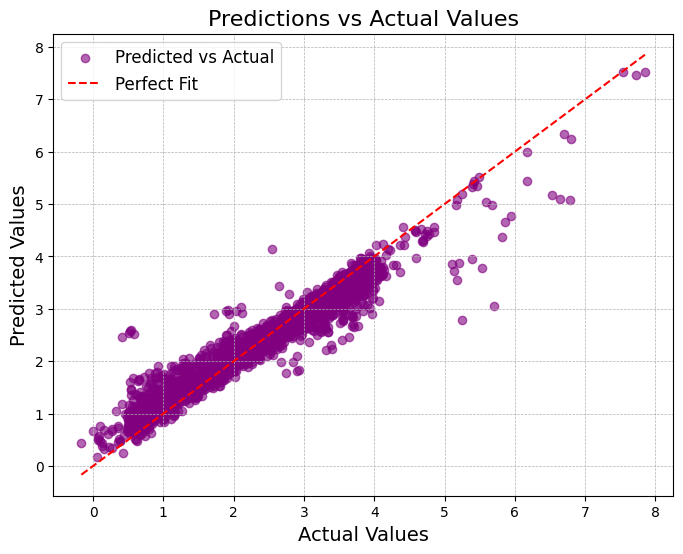

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of predictions vs actual values
plt.figure(figsize=(8, 6))

# Scatter plot with a more appealing color and transparency
plt.scatter(y_test, predictions, alpha=0.6, color='purple', label="Predicted vs Actual")

# Adding the Perfect Fit line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Perfect Fit")

# Adding title, labels, and legend
plt.title("Predictions vs Actual Values", fontsize=16)
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)

# Adding gridlines for better visibility
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjusting legend position to avoid overlap
plt.legend(loc='upper left', fontsize=12)

# Show the plot
plt.show()


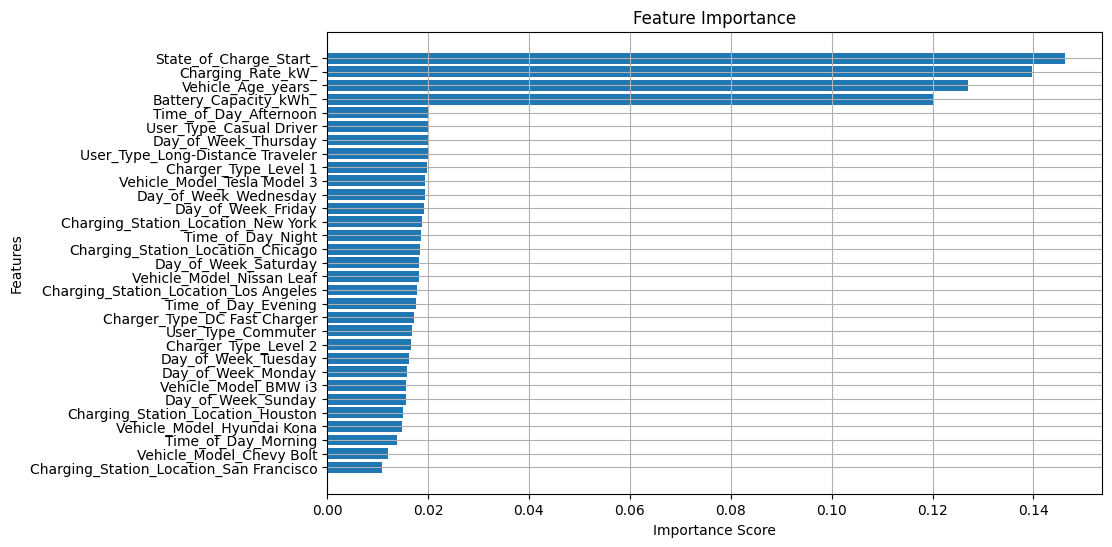

In [ ]:
# Extract feature importances
importances = model_rf.feature_importances_
feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))

# Sort and plot feature importances
sorted_idx = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_idx], importances[sorted_idx])
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid()
plt.show()